In [1]:
# Dependencies
import requests
from pprint import pprint
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress, pearsonr
import scipy.stats as stats
import scipy
import numpy as np
from scipy.optimize import curve_fit
import math

# calling the dataset from the API

In [2]:
# Calling the API
url = "https://api.covid19api.com/all"

response1 = requests.get(url).json()
response1

country = []
date = []
total_cases = []
total_deaths = []
total_recovered = []

for row in response1:
    country.append(row['Country'])
    date.append(row["Date"])
    total_cases.append(row['Confirmed'])
    total_deaths.append(row['Deaths'])
    total_recovered.append(row['Recovered'])
    

In [3]:
#creating the dataframe
covid_new_df1 = pd.DataFrame({
                            'Country': country,
                            'Date': date,
                            'Total Cases': total_cases,
                            'Total Deaths': total_deaths,
                            'Total Recovered': total_recovered
})


In [4]:
#counting the number of rows
len(covid_new_df1)

650864

In [5]:
#recognizing the data types
covid_new_df1.dtypes

Country            object
Date               object
Total Cases         int64
Total Deaths        int64
Total Recovered     int64
dtype: object

# cleaning the data

In [6]:
# cleaning the data for the US
US_df=covid_new_df1.loc[(covid_new_df1["Country"]=='United States of America')]
new_us_df=US_df.groupby('Date').max().reset_index()
covid_new_df1=covid_new_df1.loc[(covid_new_df1["Country"]!='United States of America')]
frames=[covid_new_df1,new_us_df]
covid_new_df1 = pd.concat(frames)
covid_new_df1.head()

,Country,Date,Total Cases,Total Deaths,Total Recovered
0,Afghanistan,2020-01-22T00:00:00Z,0,0,0
1,Afghanistan,2020-01-23T00:00:00Z,0,0,0
2,Afghanistan,2020-01-24T00:00:00Z,0,0,0
3,Afghanistan,2020-01-25T00:00:00Z,0,0,0
4,Afghanistan,2020-01-26T00:00:00Z,0,0,0


In [7]:
#change dateformats from objects to date time format 
covid_new_df1.loc[:,'Date']=pd.to_datetime(covid_new_df1.loc[:,"Date"]).apply(lambda x: x.date())
clean_covid19=covid_new_df1
clean_covid19.to_csv('Resources/clean_covid19_from_API')


In [8]:
#since our data from the API is updated daily and hence is dynamic. so any day this is ran, the results may vary. please be minful of that!
number_of_countries=clean_covid19['Country'].value_counts()
days=len(clean_covid19['Date'].value_counts())
days

181

# Analysing the Dataframe

In [9]:
#grouping by date and summing up the global data for each date
grouped_data = covid_new_df1.groupby("Date").sum()
grouped_data_df = grouped_data.reset_index()
grouped_data_df.head()

,Date,Total Cases,Total Deaths,Total Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [10]:
#dropping the NAN values
grouped_data1=grouped_data.dropna()
grouped_data1

,Total Cases,Total Deaths,Total Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-16,13812599,589760,7710874
2020-07-17,14054565,596502,7894239
2020-07-18,14292188,602128,8045176


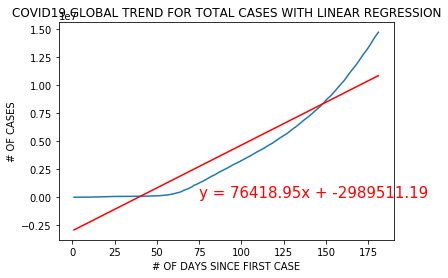

In [11]:
#plotting the global trend for Total cases and the linear regression
test = grouped_data1.reset_index().reset_index()

test["index"] = test["index"] + 1
plt.plot(test["index"], test["Total Cases"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(test["index"], test["Total Cases"])
regress_values = test["index"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(test["index"], regress_values,"r-")
plt.annotate(line_eq,(75,10),fontsize=15,color="red")
plt.title("COVID19 GLOBAL TREND FOR TOTAL CASES WITH LINEAR REGRESSION")
plt.xlabel("# OF DAYS SINCE FIRST CASE")
plt.ylabel("# OF CASES")
plt.savefig('output/covid19_fig1')
plt.show()


For COVID-19, Total cases is14615810 and Total Deaths is606544; so the death rate is %4.15


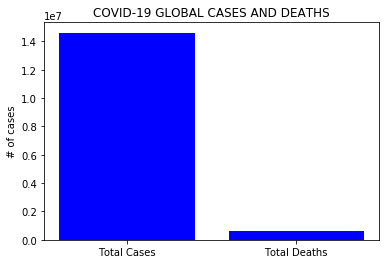

In [12]:
# covid-19 Cases and Deaths bar chart
global_total = clean_covid19.groupby(['Country'])['Total Cases'].max().sum()
global_death = clean_covid19.groupby(['Country'])['Total Deaths'].max().sum()
print(f'For COVID-19, Total cases is{global_total} and Total Deaths is{global_death}; so the death rate is %{round(global_death/global_total*100,2)}')
global_data = [global_total, global_death]
xaxis = np.arange(len(global_data))
plt.bar(xaxis, global_data, color='b', alpha=1, align="center", tick_label=("Total Cases", "Total Deaths"))
plt.title("COVID-19 GLOBAL CASES AND DEATHS")
plt.ylabel("# of cases")
plt.savefig('output/covid19_fig2')
plt.show()

REGRESSION VALUE= 0.9 *x**3 + 363.68*x**2 + -15417.79*x +89964.94


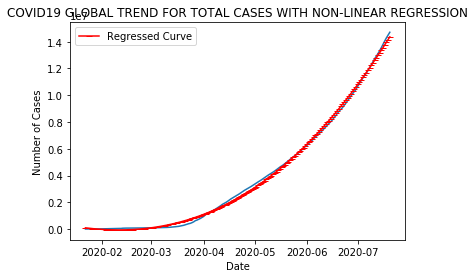

The predicted number of cases after 365 days from the start of the year based on our regression will be 86815074


<Figure size 432x288 with 0 Axes>

In [18]:
##plotting the global trend for Total cases and the nonlinear regression

#Performing regression
x=np.arange(0,days)
y=grouped_data_df["Total Cases"]
# create a function to fit with your data. a, b, c and d are the coefficients
# that curve_fit will calculate for you. 
# In this part you need to guess and/or use mathematical knowledge to find
# a function that resembles your data

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

# make the curve_fit
popt, pcov = curve_fit(func, x, y)

# The result is:
a=popt[0]
b=popt[1]
c=popt[2]
d=popt[3] 

# Print the coefficients and plot the funcion.
line_eq=print(f'REGRESSION VALUE= {round(a,2)} *x**3 + {round(b,2)}*x**2 + {round(c,2)}*x +{ round(d,2)}')

#plt data and fitted graph together

x=np.arange(0,days)
plt.plot(grouped_data_df["Date"],grouped_data_df["Total Cases"])
regress_value = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3]
plt.plot(grouped_data_df["Date"], popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Regressed Curve",color='r',marker='_') 
plt.annotate(line_eq,(50,10000000))
plt.legend(loc='upper left')
plt.title('COVID19 GLOBAL TREND FOR TOTAL CASES WITH NON-LINEAR REGRESSION')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

#save the figure in the output folder
plt.savefig('output/covid19_fig2')

#make the predictions for d days from the start of 2020
d=365
predicted_value= int(popt[0]*d**3 + popt[1]*d**2 + popt[2]*d + popt[3])
print(f'The predicted number of cases after {d} days from the start of the year based on our regression will be {predicted_value}')
plt.savefig('output/covid19_fig3')

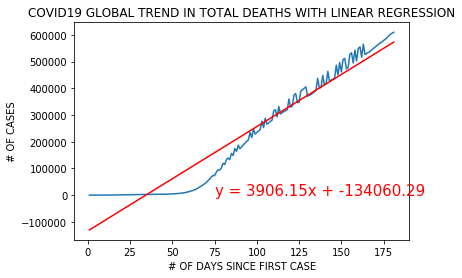

In [19]:
#plotting the global trend for Total Deaths and the linear regression
test = grouped_data1.reset_index().reset_index()

test["index"] = test["index"] + 1
plt.plot(test["index"], test["Total Deaths"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(test["index"], test["Total Deaths"])
regress_values = test["index"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(test["index"], regress_values,"r-")
plt.annotate(line_eq,(75,10),fontsize=15,color="red")
plt.title("COVID19 GLOBAL TREND IN TOTAL DEATHS WITH LINEAR REGRESSION")
plt.xlabel("# OF DAYS SINCE FIRST CASE")
plt.ylabel("# OF CASES")
plt.savefig('output/covid19_fig4')

REGRESSION VALUE= 16.84 *x**2 + 874.85*x + -39720.53
The predicted number of deaths after 365 days from the start of the year based on our regression will be 2523179


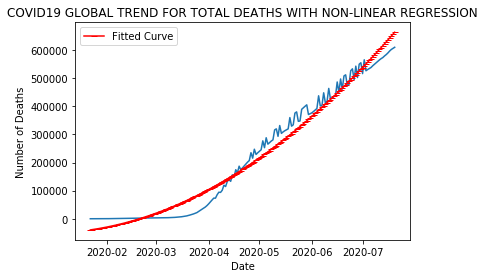

In [21]:

#plotting the global trend for Total Deaths

# plt.plot(grouped_data_df["Date"],grouped_data_df["Total Deaths"])

plt.savefig('output/covid19_fig1')



# Performing regression
x=np.arange(0,days)
y=grouped_data_df["Total Deaths"]
# create a function to fit with your data. a, b, c are the coefficients
# that curve_fit will calculate for you. 
# In this part you need to guess and/or use mathematical knowledge to find
# a function that resembles your data

def func(x, a, b, c):
    return a*x**2 + b*x +c

# make the curve_fit
popt, pcov = curve_fit(func, x, y)

# The result is:
a=popt[0]
b=popt[1]
c=popt[2]

# # Print the coefficients and plot the funcion.

line_eq=print(f'REGRESSION VALUE= {round(a,2)} *x**2 + {round(b,2)}*x + {round(c,2)}')
line_eq

# # Print the coefficients and plot the funcion.

plt.plot(grouped_data_df["Date"],grouped_data_df["Total Deaths"])
regress_value = popt[0]*x**2+ popt[1]*x**1 + popt[2]
plt.plot(grouped_data_df["Date"], popt[0]*x**2 + popt[1]*x**1 + popt[2], label="Fitted Curve",color='r',marker='_') 
plt.annotate(line_eq,(100,0),c='y')
plt.legend(loc='upper left')
plt.title('COVID19 GLOBAL TREND FOR TOTAL DEATHS WITH NON-LINEAR REGRESSION')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.savefig('output/covid19_fig2')
d=365
predicted_value= round(int(popt[0]*d**2 + popt[1]*d**1 + popt[2]),0)

print(f'The predicted number of deaths after {d} days from the start of the year based on our regression will be {predicted_value}')
plt.savefig('output/covid19_fig5')

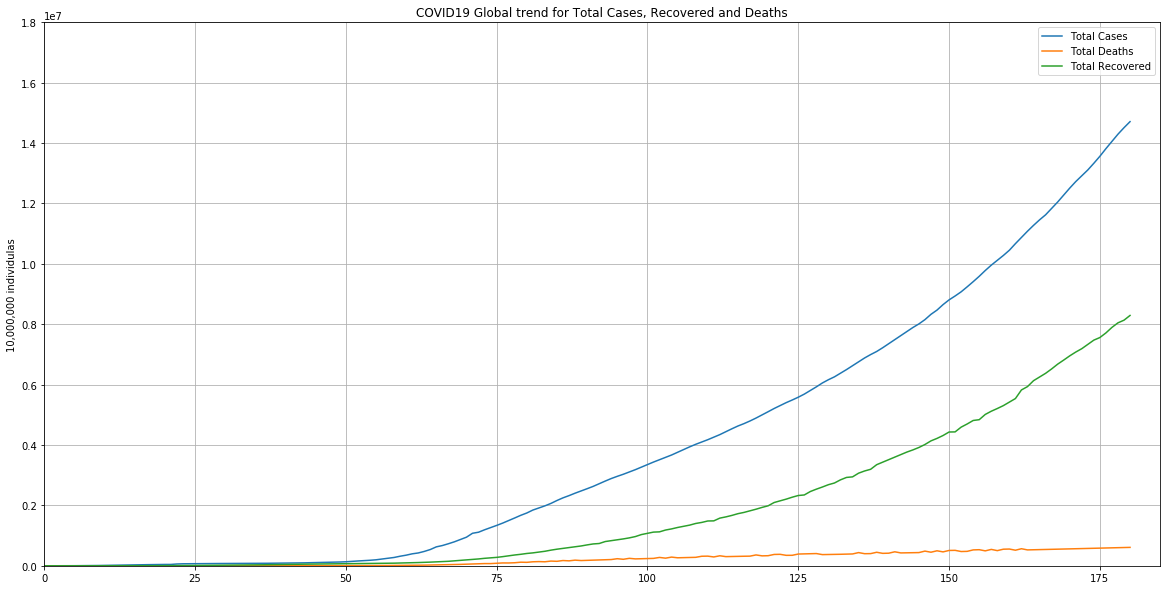

In [22]:
#plotting the global trend for Total cases, Recovered and Deaths
grouped_data_df.plot(kind='line',figsize=(20,10))
plt.grid()
plt.xlim(0,185)
plt.ylim(0,18000000)
plt.title('COVID19 Global trend for Total Cases, Recovered and Deaths' )
plt.ylabel('10,000,000 individulas')
plt.savefig('output/covid19_fig6')


In [23]:
#groupby countries and  calculate the latest stats
total_cases_per_country=covid_new_df1.groupby('Country')['Total Cases'].max()
total_recovered_per_country=covid_new_df1.groupby('Country')['Total Recovered'].max()
total_deaths_per_country=covid_new_df1.groupby('Country')['Total Deaths'].max()
a=total_cases_per_country.reset_index().iloc[:,1]
b=total_recovered_per_country.reset_index().iloc[:,1]
c=total_deaths_per_country.reset_index().iloc[:,1]

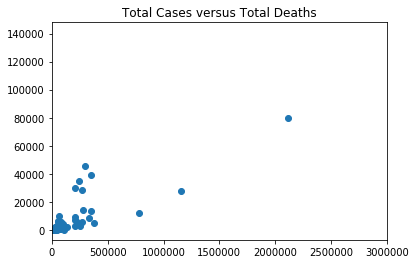

(0.932920661760605, 1.5017810415477473e-83)

In [24]:
#scatter plot of the total cases vs total deaths for all the countries
plt.scatter(a,c)
plt.title('Total Cases versus Total Deaths')
plt.savefig('output/covid19_fig8')
plt.xlim(0,3000000)
plt.show()
#calculating the coefficient
coefficient=pearsonr(a,c)
coefficient

In [ ]:
#top10_cases_per_country: governmental protection plans
top10_latest_cases=total_cases_per_country.sort_values(ascending=False).iloc[0:10]
top10_latest_cases

In [ ]:
#plotting a bar chart for the top10 cases
top10_latest_cases.plot(kind='bar')
plt.title('COVID19 TOP10 COUNTRIES IN TOTAL CASES')
plt.savefig('output/covid19_fig9')
plt.show()

In [ ]:
#top10_recovered_per_country: country's health care system efficiency
top10_latest_recovered=total_recovered_per_country.sort_values(ascending=False).iloc[0:10]


In [ ]:
#top10_deaths_per_country
top10_latest_deaths=total_deaths_per_country.sort_values(ascending=False).iloc[0:10]
top10_latest_deaths.plot(kind='bar')
#plotting a bar chart for top10 countries by total death 
plt.title('COVID19 TOP10 COUNTRIES IN TOTAL DEATHS')
plt.savefig('output/covid19_fig10')
plt.show()

In [ ]:
# stacked bar graph of top most affected countries
f, ax = plt.subplots(figsize=(20,10))
x=top10_latest_cases.reset_index()["Country"]
y=top10_latest_cases.reset_index().iloc[:,1]
z=top10_latest_recovered.reset_index().iloc[:,1]
q=top10_latest_deaths.reset_index().iloc[:,1]
plt.bar(x,y,label='Cases')
plt.bar(x,z,label = 'Recovered')
plt.bar(x,q,label = 'Deaths')
plt.legend()
plt.title('Statistics on top10 affected countries by COVID-19')
plt.ylabel('number of individuals affected')
plt.savefig('output/covid19_fig11')
plt.show()
#calculating the death percentage per country
for i in np.arange(0,10):
    print(f'The Death Rate in {x[i]} is %{round(q[i]/y[i]*100,2)}')


In [ ]:
#scatter plot cases vs recovered for top10 countries with the linear regression

plt.scatter(y,z)
# linear regression on cases vs recovered
(slope, intercept, rvalue, pvalue, stderr) = linregress(y, z)
recovered_slope=slope
regress_value=slope*y+intercept
recovered_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(recovered_line_eq,(250000,800000))
plt.plot(y, regress_value, 'r', label='fitted line')
plt.title('Total Cases versus Total Recovered per top10 affected countries')
plt.savefig('output/covid19_fig12')
plt.show()
#calculating the coefficient
coefficient=pearsonr(y,z)
coefficient

In [ ]:
#scatter plot cases vs recovered_per country

plt.scatter(y,q)
# linear regression on cases vs deaths
(slope, intercept, rvalue, pvalue, stderr) = linregress(y, q)
death_slope=slope
regress_value=slope*y+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(500000,50000))
plt.plot(y, regress_value, 'r', label='fitted line')
plt.title('Total Cases versus Total Deaths per top10 affected countries')
plt.savefig('output/covid19_fig13')
plt.show()
#calculating the coefficient
coefficient=pearsonr(y,q)
coefficient
